In [1]:
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
def process_data(file_path):
    # Load data from CSV file
    dataRaw = pd.read_csv(file_path)
    
    # Parse data to create tensor
    k = 0

    Reps = np.unique(dataRaw['Rep_Num'])
    FOVs = np.unique(dataRaw['FOV_Num'])
    Times = np.unique(dataRaw['Time'])
    Cells = np.unique(dataRaw['Cell_id'])

    print(f'Processing {file_path}')
    print('Total Reps: ', len(Reps))
    print('Total FOVs: ', len(FOVs))
    print('Total cells: ', len(Cells))
    print('Time points: ', len(Times))

    dataTensor = np.zeros((len(Cells), len(Times), 5))

    for iCell in range(len(Cells)):
        for iTime in range(len(Times)):
            if dataRaw['is_cell_vital'][k] == 1:
                dataTensor[iCell, iTime, 0] = dataRaw['num_rna_nascent'][k]
                dataTensor[iCell, iTime, 1] = dataRaw['num_rna_nuc'][k]
                dataTensor[iCell, iTime, 2] = dataRaw['num_rna_cyto'][k]
                dataTensor[iCell, iTime, 3] = dataRaw['Cyto_Intensity_1'][k]
                dataTensor[iCell, iTime, 4] = 1
            else:
                dataTensor[iCell, iTime, 0] = np.nan
                dataTensor[iCell, iTime, 1] = np.nan
                dataTensor[iCell, iTime, 2] = np.nan
                dataTensor[iCell, iTime, 3] = np.nan
                dataTensor[iCell, iTime, 4] = 0
            k += 1
    
    return dataTensor, Times


In [4]:
def plot_data(dataTensors, Times, labels):
    featureNames = ['Nascent RNA', 'Nuclear RNA', 'Cytoplasmic RNA', 'Protein', 'Vitality']
    
    # Plot data for each condition
    fig, ax = plt.subplots(len(dataTensors), 5, figsize=(20, 5 * len(dataTensors)))
    
    for i, (dataTensor, label) in enumerate(zip(dataTensors, labels)):
        dataMean = np.nanmean(dataTensor, axis=0)
        dataStd = np.nanstd(dataTensor, axis=0) / np.sqrt(np.sum(~np.isnan(dataTensor), axis=0))
        
        for j in range(5):
            if len(dataTensors) > 1:
                ax[i, j].errorbar(Times, dataMean[:, j], yerr=dataStd[:, j], fmt='-o')
                ax[i, j].set_title(f'{label} - {featureNames[j]}')
                ax[i, j].set_xlabel('Time')
                ax[i, j].set_ylim([0, 1.1 * np.nanmax(dataMean[:, j] + dataStd[:, j])])
                ax[i, j].set_xlim([1000, 2000])
            else:
                ax[j].errorbar(Times, dataMean[:, j], yerr=dataStd[:, j], fmt='-o')
                ax[j].set_title(f'{label} - {featureNames[j]}')
                ax[j].set_xlabel('Time')
                ax[j].set_ylim([0, 1.1 * np.nanmax(dataMean[:, j] + dataStd[:, j])])
                ax[i, j].set_xlim([1000, 2000])
            
            # Add vertical line at x = 1200
            ax[i, j].axvline(x=1200, color='r', linestyle='--')

    plt.tight_layout()
    plt.show()

In [5]:
# List of files to process
files = [
    'C:/Users/apurv/OneDrive/Desktop/QBio/Challenges/UQbio2024_Team5/TrueData/NoDrug_DesignResults.csv',
    'C:/Users/apurv/OneDrive/Desktop/QBio/Challenges/UQbio2024_Team5/TrueData/Drug2_1000nM_DesignResults.csv',
    'C:/Users/apurv/OneDrive/Desktop/QBio/Challenges/UQbio2024_Team5/TrueData/Drug4_1000nM_DesignResults.csv',
    'C:/Users/apurv/OneDrive/Desktop/QBio/Challenges/UQbio2024_Team5/TrueData/Drug6_1000nM_DesignResults.csv',
    'C:/Users/apurv/OneDrive/Desktop/QBio/Challenges/UQbio2024_Team5/TrueData/Drug7_1000nM_DesignResults.csv',
    'C:/Users/apurv/OneDrive/Desktop/QBio/Challenges/UQbio2024_Team5/TrueData/Drug10_1000nM_DesignResults.csv'
]


In [6]:
# Process each file
dataTensors = []
labels = ['No Drug', 'Drug 2','Drug 4', 'Drug 6', 'Drug 7','Drug 10']

Processing C:/Users/apurv/OneDrive/Desktop/QBio/Challenges/UQbio2024_Team5/TrueData/NoDrug_DesignResults.csv
Total Reps:  2
Total FOVs:  6
Total cells:  141
Time points:  21
Processing C:/Users/apurv/OneDrive/Desktop/QBio/Challenges/UQbio2024_Team5/TrueData/Drug2_1000nM_DesignResults.csv
Total Reps:  2
Total FOVs:  6
Total cells:  140
Time points:  21
Processing C:/Users/apurv/OneDrive/Desktop/QBio/Challenges/UQbio2024_Team5/TrueData/Drug4_1000nM_DesignResults.csv
Total Reps:  2
Total FOVs:  6
Total cells:  142
Time points:  21
Processing C:/Users/apurv/OneDrive/Desktop/QBio/Challenges/UQbio2024_Team5/TrueData/Drug6_1000nM_DesignResults.csv
Total Reps:  2
Total FOVs:  6
Total cells:  143
Time points:  21
Processing C:/Users/apurv/OneDrive/Desktop/QBio/Challenges/UQbio2024_Team5/TrueData/Drug7_1000nM_DesignResults.csv
Total Reps:  2
Total FOVs:  6
Total cells:  132
Time points:  21
Processing C:/Users/apurv/OneDrive/Desktop/QBio/Challenges/UQbio2024_Team5/TrueData/Drug10_1000nM_DesignRe

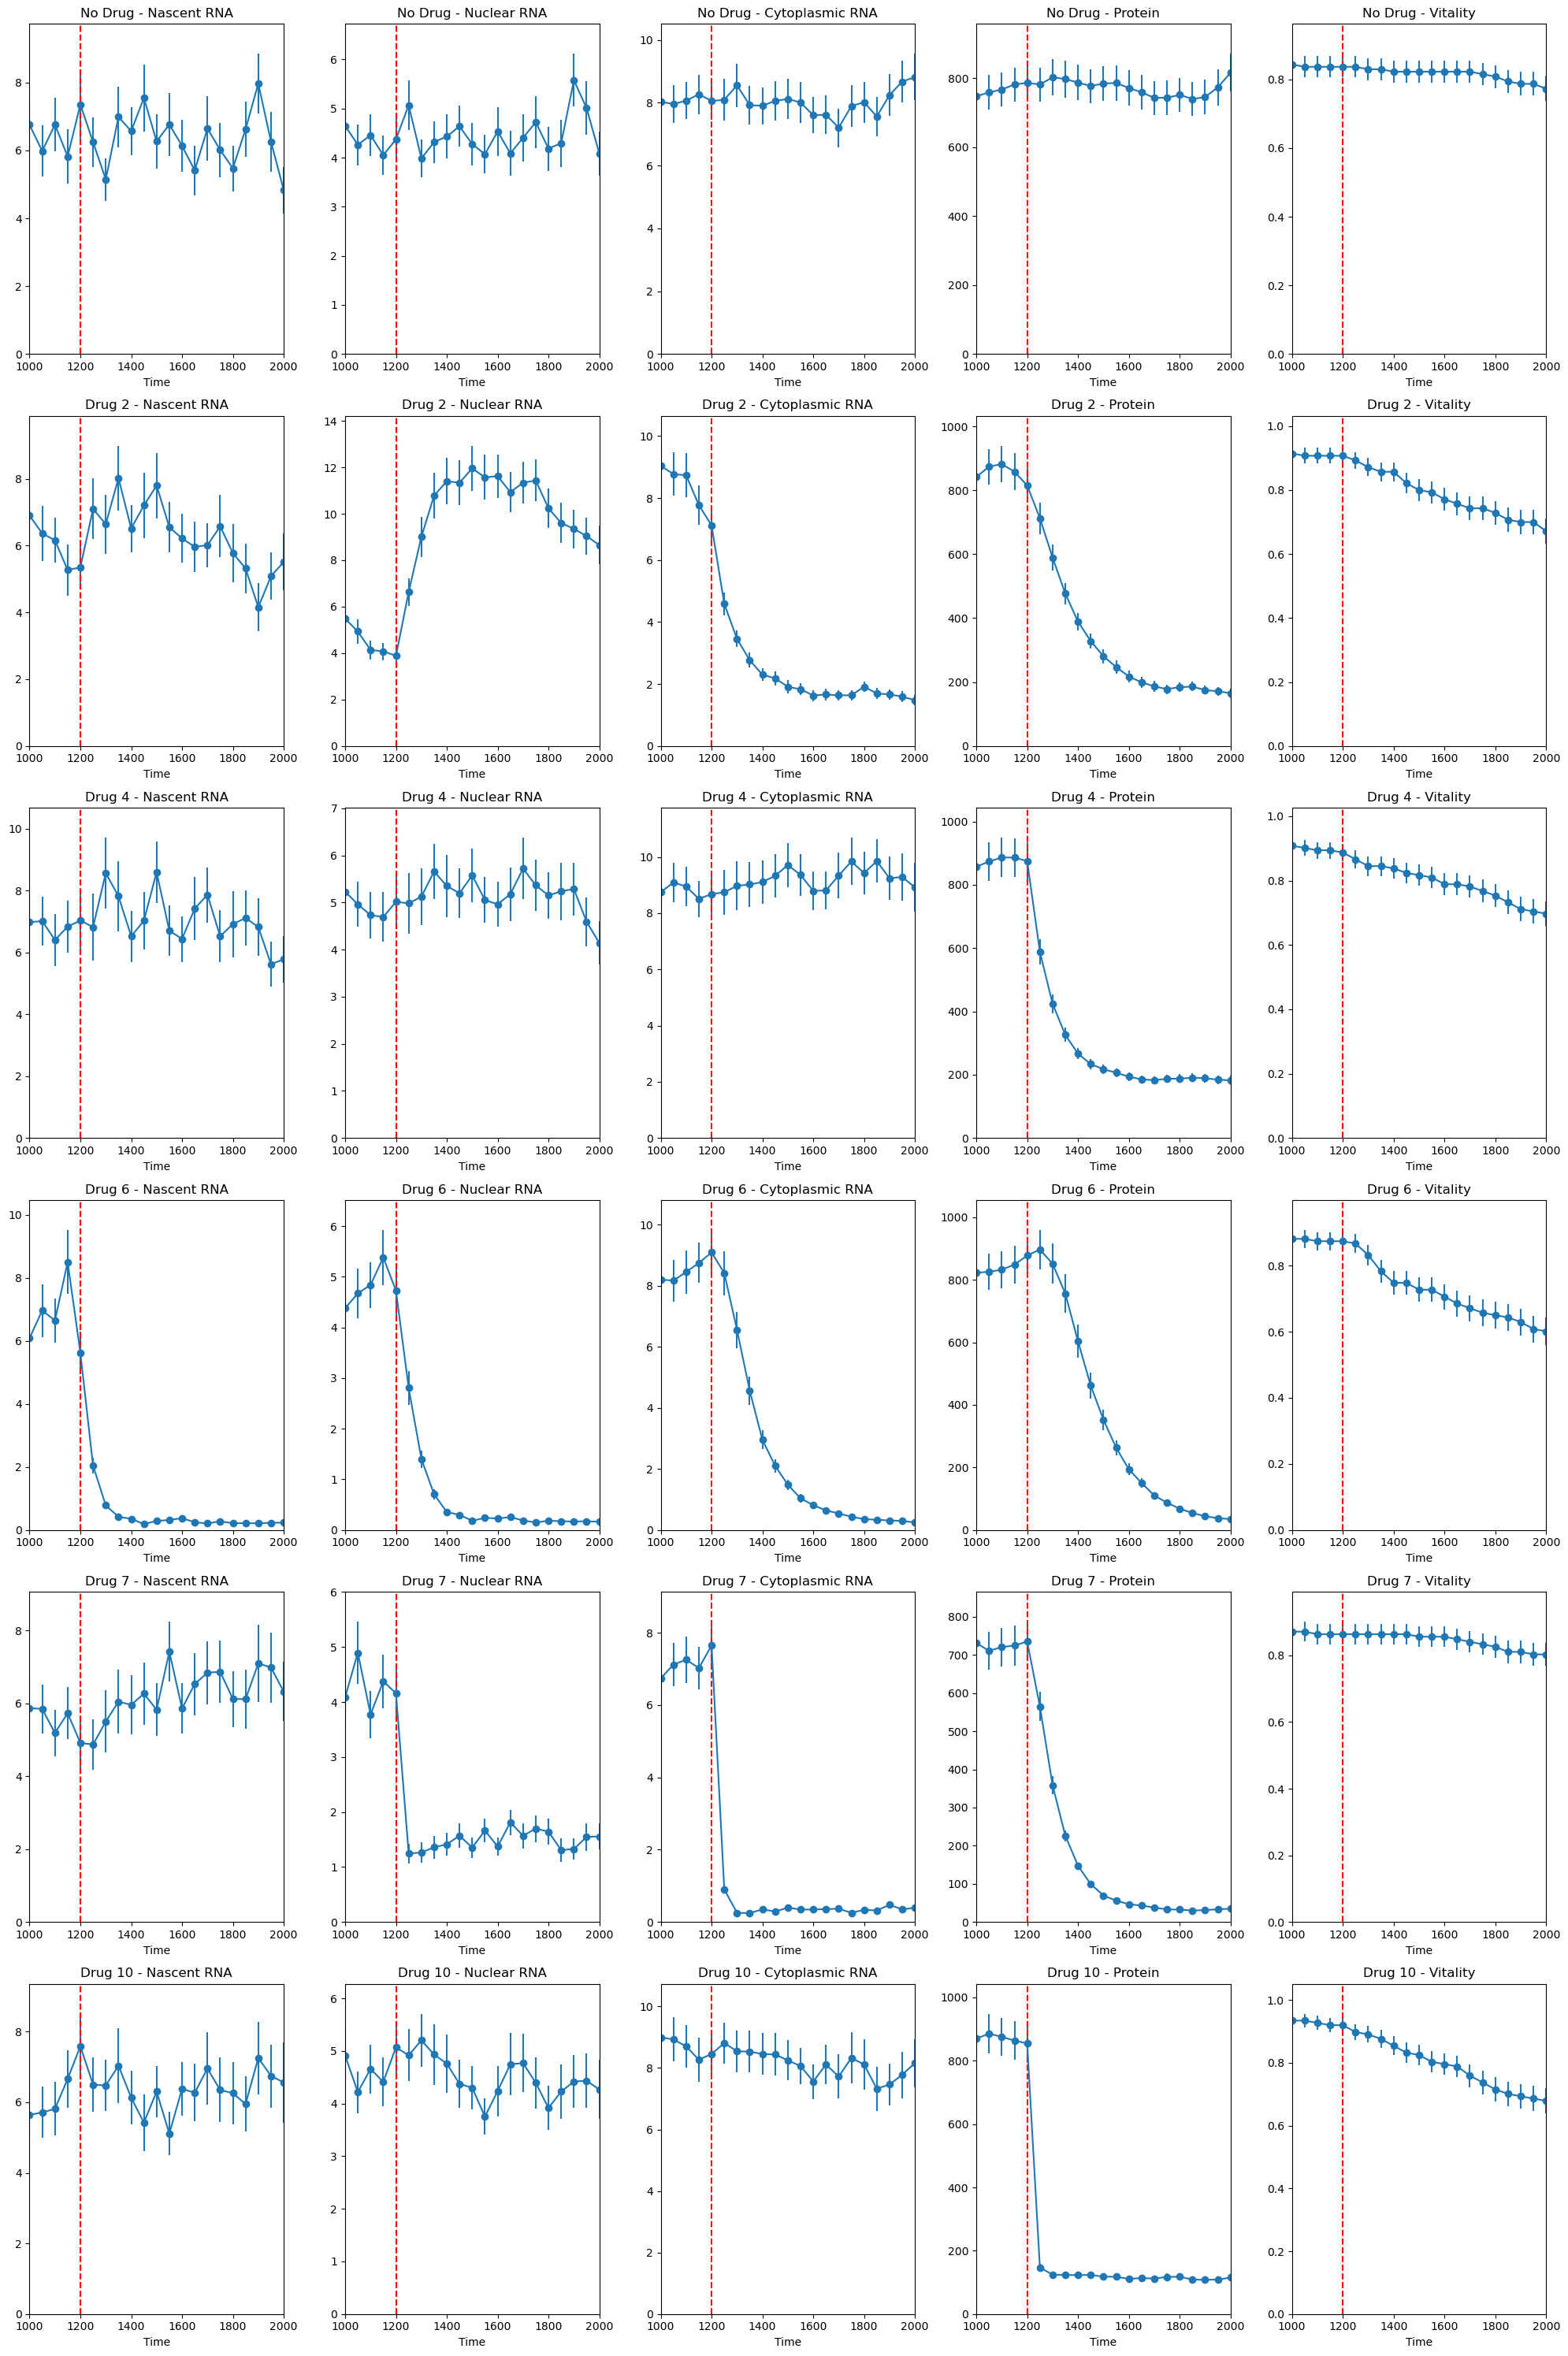

In [7]:
for file in files:
    dataTensor, Times = process_data(file)
    dataTensors.append(dataTensor)
# Plot the data for all conditions
plot_data(dataTensors, Times, labels)

In [ ]:
for file in files:
    dataTensor, Times = process_data(file)
    dataTensors.append(dataTensor)
    # only one line may be specified; full height
    plt.axvline(x = 1200, color = 'b')
# Plot the data for all conditions
plot_data(dataTensors, Times, labels)